In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
img_data_train=[]
for i in range (5000):
    img = mpimg.imread('../datasets/cartoon_set/img/' + str(i) + '.png')
    img=cv2.resize(img,(100,100))
    img_data_train.append(img)

In [3]:
img_data_test=[]
for i in range (2500):
    img = mpimg.imread('../datasets/cartoon_set_test/img/' + str(i) + '.png')
    img=cv2.resize(img,(100,100))
    img_data_test.append(img)

In [4]:
train_label=pd.read_table('../datasets/cartoon_set/labels.csv')
test_label=pd.read_table('../datasets/cartoon_set_test/labels.csv')

In [11]:
x_train=np.array(img_data_train)
x_test=np.array(img_data_test)

y_train= train_label['face_shape']
y_test= test_label['face_shape']

y_train = y_train[:5000]
y_train = np.array(y_train)
vector2arr = np.mat(y_train)
y_train = vector2arr.A.T

y_test=y_test
y_test = np.array(y_test)
vector2arr = np.mat(y_test)
y_test = vector2arr.A.T

In [12]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100,100,4)),  # 卷积层1，卷积核3*3
    layers.MaxPooling2D((2, 2)),  # 池化层1，2*2采样
    layers.Conv2D(64, (3, 3), activation='relu'),  # 卷积层2，卷积核3*3
    layers.MaxPooling2D((2, 2)),  # 池化层2，2*2采样
    layers.Conv2D(64, (3, 3), activation='relu'),  # 卷积层3，卷积核3*3
    layers.Dropout(.2),


    layers.Flatten(),  # Flatten层，连接卷积层与全连接层
    layers.Dense(128, activation='relu'),  # 全连接层，特征进一步提取
    layers.Dropout(.2),
    layers.Dense(64, activation='relu'),  # 全连接层，特征进一步提取
    layers.Dense(10)  # 输出层，输出预期结果"
])

model.summary()  # 打印网络结构


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        1184      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 64)        36928     
                                                                 
 dropout_2 (Dropout)         (None, 21, 21, 64)       

In [13]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
157/157 [==============================] - 39s 235ms/step - loss: 1.6382 - accuracy: 0.2392 - val_loss: 1.2984 - val_accuracy: 0.4528
Epoch 2/10
157/157 [==============================] - 36s 229ms/step - loss: 0.3825 - accuracy: 0.8588 - val_loss: 0.0525 - val_accuracy: 0.9856
Epoch 3/10
157/157 [==============================] - 36s 230ms/step - loss: 0.0345 - accuracy: 0.9898 - val_loss: 0.0162 - val_accuracy: 0.9964
Epoch 4/10
157/157 [==============================] - 36s 230ms/step - loss: 0.0155 - accuracy: 0.9946 - val_loss: 0.0068 - val_accuracy: 0.9976
Epoch 5/10
157/157 [==============================] - 36s 231ms/step - loss: 0.0061 - accuracy: 0.9986 - val_loss: 0.0127 - val_accuracy: 0.9960
Epoch 6/10
157/157 [==============================] - 36s 232ms/step - loss: 0.0089 - accuracy: 0.9982 - val_loss: 0.0070 - val_accuracy: 0.9984
Epoch 7/10
157/157 [==============================] - 36s 231ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0062 - val_ac

In [15]:
import pickle
#save model
pickle.dump(model,open("CNN_shape.dat","wb"))  

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File 

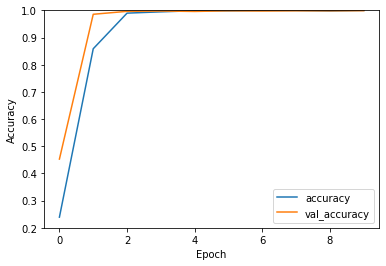

79/79 - 4s - loss: 0.0078 - accuracy: 0.9988 - 4s/epoch - 54ms/step


<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')
plt.show()
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)
plt.savefig("./B1_accuracy.jpg") 

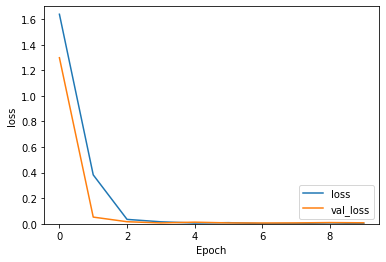

79/79 - 4s - loss: 0.0078 - accuracy: 0.9988 - 4s/epoch - 56ms/step


<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1.7])
plt.legend(loc='lower right')
plt.show()
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)
plt.savefig("./B1_loss.jpg") 